In [ ]:
# def squareform_sp(w):
#     """
#     Sparse counterpart of numpy's squareform
    
#     Parameters:
#     w : sparse or dense vector with n(n-1)/2 elements OR matrix with size [n, n] and zero diagonal
    
#     Returns:
#     W : matrix form of input vector w OR vector form of input matrix W
#     """
#     if sp.issparse(w):
#         is_sparse = True
#     else:
#         is_sparse = False
#         w = np.asarray(w)
    
#     # Determine if input is a vector
#     if w.ndim == 1 or w.shape[0] == 1 or w.shape[1] == 1:
#         # VECTOR -> MATRIX
#         l = w.size
#         n = int(round((1 + np.sqrt(1 + 8 * l)) / 2))
#         if l != n * (n - 1) // 2:
#             raise ValueError("Bad vector size!")
        
#         if is_sparse:
#             ind_vec = w.nonzero()[0]
#             s = w.data
#         else:
#             ind_vec = np.nonzero(w)[0]
#             s = w[ind_vec]
        
#         num_nz = len(ind_vec)
#         ind_i = np.zeros(num_nz, dtype=int)
#         ind_j = np.zeros(num_nz, dtype=int)
        
#         curr_row = 0
#         offset = 0
#         len_row = n - 1
#         for idx in range(num_nz):
#             ind_vec_i = ind_vec[idx]
#             while ind_vec_i >= (len_row + offset):
#                 offset += len_row
#                 len_row -= 1
#                 curr_row += 1
#             ind_i[idx] = curr_row
#             ind_j[idx] = ind_vec_i - offset + curr_row + 1
        
#         # For the lower triangular part, add the transposed matrix
#         data = np.concatenate([s, s])
#         row_indices = np.concatenate([ind_i, ind_j])
#         col_indices = np.concatenate([ind_j, ind_i])
#         W = sp.csr_matrix((data, (row_indices, col_indices)), shape=(n, n))
#         return W

#     else:
#         # MATRIX -> VECTOR
#         m, n = w.shape
#         if m != n or not np.all(w.diagonal() == 0):
#             raise ValueError("Matrix has to be square with zero diagonal!")
        
#         if is_sparse:
#             # Convert to COO format to align data and indices
#             w_coo = w.tocoo()
#             ind_i = w_coo.row
#             ind_j = w_coo.col
#             s = w_coo.data
#         else:
#             ind_i, ind_j = np.nonzero(w)
#             s = w[ind_i, ind_j]
        
#         # Keep only upper triangular part
#         ind_upper = ind_i < ind_j
#         ind_i = ind_i[ind_upper]
#         ind_j = ind_j[ind_upper]
#         s = s[ind_upper]
        
#         # Compute new (vector) index from (i,j) (matrix) indices
#         new_ind = n * ind_i - ind_i * (ind_i + 1) // 2 + ind_j - ind_i - 1
#         l = n * (n - 1) // 2
#         w_vec = sp.csr_matrix((s, (new_ind, np.zeros_like(new_ind))), shape=(l, 1))
#         return w_vec


In [ ]:
# def sum_squareform(n, mask=None):
#     import numpy as np
#     from scipy.sparse import csr_matrix

#     if mask is not None:
#         mask = np.asarray(mask).flatten()
#         if len(mask) != n * (n - 1) // 2:
#             raise ValueError('Mask size has to be n(n-1)/2')

#         ind_vec = np.flatnonzero(mask)
#         ncols = len(ind_vec)

#         I = np.zeros(ncols, dtype=int)
#         J = np.zeros(ncols, dtype=int)

#         curr_row = 0
#         offset = 0
#         len_row = n - 1
#         for ii in range(ncols):
#             ind_vec_i = ind_vec[ii]
#             while ind_vec_i > (len_row + offset - 1):
#                 offset += len_row
#                 len_row -= 1
#                 curr_row += 1
#             I[ii] = curr_row
#             J[ii] = ind_vec_i - offset + curr_row + 1
#     else:
#         ncols = n * (n - 1) // 2
#         I = np.zeros(ncols, dtype=int)
#         J = np.zeros(ncols, dtype=int)

#         k = 0
#         for i in range(n - 1):
#             for j in range(i + 1, n):
#                 I[k] = i
#                 J[k] = j
#                 k += 1

#     # Construct St
#     row_indices = np.concatenate([np.arange(ncols), np.arange(ncols)])
#     col_indices = np.concatenate([I, J])
#     data = np.ones(2 * ncols)

#     St = csr_matrix((data, (row_indices, col_indices)), shape=(ncols, n))
#     S = St.transpose()

#     return S, St


In [ ]:
# # Python test
# import numpy as np
# import scipy.sparse as sp

# # Sample symmetric matrix with zeros on the diagonal
# n = 5
# W = sp.random(n, n, density=0.2)
# W = W + W.T  # Make it symmetric
# W.setdiag(0)  # Set diagonal to zero

# # Convert matrix to vector
# w_vec = squareform_sp(W)

# # Convert vector back to matrix
# W_reconstructed = squareform_sp(w_vec)

# # Verify that W and W_reconstructed are the same
# print( (W != W_reconstructed).nnz == 0)


In [ ]:
# import numpy as np
# from scipy.sparse import csr_matrix

# # Define parameters
# n = 4
# mask = None  # or np.random.randint(0, 2, size=n * (n - 1) // 2)

# # Generate random weights
# W = np.random.rand(n, n)
# W = (W + W.T) / 2  # Make it symmetric
# np.fill_diagonal(W, 0)

# # Vectorize W using squareform
# from scipy.spatial.distance import squareform
# w = squareform(W)

# # Get S and St
# S, St = sum_squareform(n, mask)

# # Compute sum of weights connected to each node
# node_sums = S @ w

# # Compare with actual sums
# actual_sums = W.sum(axis=1)

# # Verify they are close
# print( np.allclose(node_sums, actual_sums))


In [ ]:
# def gsp_learn_graph_log_degrees(Z, a, b, params=None):
#     """
#     Learns a graph structure by optimizing a log-degrees model.

#     Parameters:
#     -----------
#     Z : array-like
#         Input data matrix or condensed distance matrix (squared pairwise distances).

#     a : float
#         Coefficient for the logarithmic penalty term (controls connectivity).

#     b : float
#         Regularization coefficient (controls sparsity).

#     params : dict, optional
#         A dictionary of optional parameters:
#         - 'verbosity': int, level of verbosity (default: 1)
#         - 'maxit': int, maximum number of iterations (default: 1000)
#         - 'tol': float, tolerance for convergence (default: 1e-5)
#         - 'step_size': float, step size for the gradient descent (default: 0.5)
#         - 'max_w': float, maximum allowable weight (default: np.inf)
#         - 'w_0': array-like or int, initial weight matrix or value (default: 0)
#         - 'c': float, regularization coefficient for initial weight matrix
#         - 'fix_zeros': bool, whether to fix zeros in the weight matrix (default: False)
#         - 'edge_mask': array-like, mask for fixed edges (required if 'fix_zeros' is True)

#     Returns:
#     --------
#     W : array-like
#         The learned weight matrix (n x n).

#     stat : dict
#         Output statistics including convergence information.

#     Raises:
#     -------
#     ValueError
#         If 'params.w_0' is specified but 'params.c' is not, or if 'params.edge_mask' is required but not provided.
#     """
#     # Default parameters
#     if params is None:
#         params = {}

#     verbosity = params.get('verbosity', 1)
#     maxit = params.get('maxit', 1000)
#     tol = params.get('tol', 1e-5)
#     step_size = params.get('step_size', 0.5)
#     fix_zeros = params.get('fix_zeros', False)
#     max_w = params.get('max_w', np.inf)
#     w_0 = params.get('w_0', 0)

#     # Initialize z
#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         z = Z.copy()
#     else:
#         z = squareform_sp(Z)

#     z = z.toarray().flatten()
#     z = np.asarray(z, dtype=float)  # Ensure z is a NumPy array of floats
#     l = len(z)
#     n = int(round((1 + np.sqrt(1 + 8 * l)) / 2))  # Number of nodes

#     # Handle w_0
#     if not np.isscalar(w_0) or w_0 != 0:
#         if 'c' not in params:
#             raise ValueError('When params["w_0"] is specified, params["c"] should also be specified.')
#         else:
#             c = params['c']
#         if isinstance(w_0, np.ndarray) and w_0.ndim == 1:
#             w_0 = w_0.copy()
#         else:
#             w_0 = squareform_sp(w_0)
#         w_0 = w_0.flatten()
#         w_0 = np.asarray(w_0, dtype=float)
#     else:
#         w_0 = 0
#         c = 0  # Ensure c is defined

#     # Handle fix_zeros
#     if fix_zeros:
#         if 'edge_mask' not in params:
#             raise ValueError('When params["fix_zeros"] is True, params["edge_mask"] must be provided.')
#         edge_mask = params['edge_mask']
#         if not isinstance(edge_mask, np.ndarray) or edge_mask.ndim != 1:
#             edge_mask = squareform_sp(edge_mask)
#         ind = np.nonzero(edge_mask.flatten())[0]
#         z = z[ind]
#         if not np.isscalar(w_0):
#             w_0 = w_0[ind]
#     else:
#         edge_mask = None

#     # Initialize w
#     w = np.zeros_like(z)

#     # Needed operators
#     if fix_zeros:
#         S, St = sum_squareform(n, edge_mask)
#     else:
#         S, St = sum_squareform(n)

#     K_op = lambda w: S @ w
#     Kt_op = lambda z: St @ z

#     if fix_zeros:
#         norm_K = sparse_norm(S, ord=2)
#     else:
#         norm_K = np.sqrt(2 * (n - 1))

#     # Define functions f, g, h
#     f_eval = lambda w: 2 * np.dot(w, z)
#     f_prox = lambda w, c: np.minimum(max_w, np.maximum(0, w - 2 * c * z))

#     param_prox_log = {'verbose': verbosity - 3}
#     g_eval = lambda s: -a * np.sum(np.log(s))
#     # g_star_prox = lambda z_in, c_in: z_in - c_in * a * prox_sum_log(z_in / (c_in * a), 1 / (c_in * a), param_prox_log)
#     # g_star_prox = lambda z_in, c_in: np.asarray(z_in) - c_in * a * prox_sum_log(np.asarray(z_in) / (c_in * a), 1 / (c_in * a), param_prox_log)
#     g_star_prox = lambda z, c: z - c * a * prox_sum_log(z / (c * a), 1 / (c * a), param_prox_log)[0]


#     # Corrected h_eval and h_grad with division by 2
#     if np.all(w_0 == 0):
#         # No prior W0
#         h_eval = lambda w: (b / 2) * np.linalg.norm(w) ** 2
#         h_grad = lambda w: b * w
#         h_beta = b  # Lipschitz constant of h_grad
#     else:
#         # With prior W0
#         h_eval = lambda w: (b / 2) * np.linalg.norm(w) ** 2 + (c / 2) * np.linalg.norm(w - w_0) ** 2
#         h_grad = lambda w: b * w + c * (w - w_0)
#         h_beta = b + c  # Lipschitz constant of h_grad

#     # Parameters for convergence
#     mu = h_beta + norm_K
#     epsilon = 1e-6  # A small positive value
#     gn = (1 - epsilon) / mu  # Step size in (epsilon, (1 - epsilon)/mu)

#     # Initialize variables
#     v_n = K_op(w)

#     stat = {}
#     if verbosity > 1:
#         stat['f_eval'] = []
#         stat['g_eval'] = []
#         stat['h_eval'] = []
#         stat['fgh_eval'] = []
#         stat['pos_violation'] = []

#     start_time = time.time()

#     # Iterative optimization
#     for i in range(maxit):
#         # Primal and dual updates
#         Y_n = w - gn * (h_grad(w) + Kt_op(v_n))
#         y_n = v_n + gn * K_op(w)
#         P_n = f_prox(Y_n, gn)
#         p_n = g_star_prox(y_n, gn)
#         Q_n = P_n - gn * (h_grad(P_n) + Kt_op(p_n))
#         q_n = p_n + gn * K_op(P_n)

#         # Compute relative norms
#         rel_norm_primal = np.linalg.norm(-Y_n + Q_n) / (np.linalg.norm(w) + 1e-10)
#         rel_norm_dual = np.linalg.norm(-y_n + q_n) / (np.linalg.norm(v_n) + 1e-10)

#         if verbosity > 1:
#             # Record statistics
#             stat['f_eval'].append(f_eval(w))
#             stat['g_eval'].append(g_eval(K_op(w)))
#             stat['h_eval'].append(h_eval(w))
#             stat['fgh_eval'].append(stat['f_eval'][-1] + stat['g_eval'][-1] + stat['h_eval'][-1])
#             stat['pos_violation'].append(-np.sum(np.minimum(0, w)))
#             print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   OBJ {stat["fgh_eval"][-1]:6.3e}')

#         # Update variables
#         w = w - Y_n + Q_n
#         v_n = v_n - y_n + q_n

#         # Check convergence
#         if rel_norm_primal < tol and rel_norm_dual < tol:
#             break

#     total_time = time.time() - start_time
#     if verbosity > 0:
#         final_obj = f_eval(w) + g_eval(K_op(w)) + h_eval(w)
#         print(f'# iters: {i+1:4d}. Rel primal: {rel_norm_primal:6.4e} Rel dual: {rel_norm_dual:6.4e}  OBJ {final_obj:6.3e}')
#         print(f'Time needed is {total_time} seconds')

#     # Reconstruct full weight vector if fix_zeros was used
#     if fix_zeros:
#         w_full = np.zeros(l)
#         w_full[ind] = w
#         w = w_full

#     # Convert vectorized weights back to matrix form
#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         W = w
#     else:
#         W = squareform(w)

#     stat['time'] = total_time

#     return W, stat


In [ ]:
# def squareform_sp(Z):
#     """
#     Converts a distance matrix Z into a vector form (or vice versa) similar to MATLAB's squareform,
#     but returns a sparse matrix.
#     """
#     if isinstance(Z, np.ndarray):
#         # Assuming Z is a square matrix, extract the upper triangular part excluding the diagonal
#         triu_indices = np.triu_indices_from(Z, k=1)
#         data = Z[triu_indices]
#         return coo_matrix((data, triu_indices), shape=Z.shape)
#     else:
#         # If Z is already a vector, return it as is
#         return Z

In [ ]:
# def gsp_learn_graph_log_degrees(Z, a, b, params=None):

#     # Default parameters
#     if params is None:
#         params = {}

#     verbosity = params.get('verbosity', 1)
#     maxit = params.get('maxit', 1000)
#     tol = params.get('tol', 1e-5)
#     step_size = params.get('step_size', 0.5)  # Should be in (0, 1)
#     fix_zeros = params.get('fix_zeros', False)
#     max_w = params.get('max_w', np.inf)
#     w_0 = params.get('w_0', 0)

#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         z = Z.copy()
#     else:
#         z = squareform_sp(Z)
    
#     # Ensure z is a dense NumPy array
#     if isinstance(z, np.ndarray):
#         z = z.flatten()
#     else:
#         z = z.toarray().flatten()
        
#     z = np.asarray(z, dtype=float)  # Ensure z is a NumPy array of floats
#     l = len(z)
#     n = int(round((1 + np.sqrt(1 + 8 * l)) / 2))  # Number of nodes

#     # Handle w_0
#     if not np.isscalar(w_0) or w_0 != 0:
#         if 'c' not in params:
#             raise ValueError('When params["w_0"] is specified, params["c"] should also be specified.')
#         else:
#             c = params['c']
#         if isinstance(w_0, np.ndarray) and w_0.ndim == 1:
#             w_0 = w_0.copy()
#         else:
#             w_0 = squareform_sp(w_0)
#         w_0 = w_0.flatten()
#         w_0 = np.asarray(w_0, dtype=float)
#     else:
#         w_0 = 0
#         c = 0  # Ensure c is defined

#     # Handle fix_zeros
#     if fix_zeros:
#         if 'edge_mask' not in params:
#             raise ValueError('When params["fix_zeros"] is True, params["edge_mask"] must be provided.')
#         edge_mask = params['edge_mask']
#         if not isinstance(edge_mask, np.ndarray) or edge_mask.ndim != 1:
#             edge_mask = squareform_sp(edge_mask)
#         ind = np.nonzero(edge_mask.flatten())[0]
#         z = z[ind]
#         if not np.isscalar(w_0):
#             w_0 = w_0[ind]
#     else:
#         edge_mask = None

#     # Initialize w
#     w = np.zeros_like(z)

#     # Needed operators
#     if fix_zeros:
#         S, St = sum_squareform(n, edge_mask)
#     else:
#         S, St = sum_squareform(n)

#     K_op = lambda w: S @ w
#     Kt_op = lambda z: St @ z

#     if fix_zeros:
#         norm_K = sparse_norm(S, ord=2)
#     else:
#         norm_K = np.sqrt(2 * (n - 1))

#     # Define functions f, g, h
#     f_eval = lambda w: 2 * np.dot(w, z)
#     f_prox = lambda w, c: np.minimum(max_w, np.maximum(0, w - 2 * c * z))

#     param_prox_log = {'verbose': verbosity - 3}
#     g_eval = lambda s: -a * np.sum(np.log(s))
#     g_star_prox = lambda z_in, c_in: z_in - c_in * a * prox_sum_log(z_in / (c_in * a), 1 / (c_in * a), param_prox_log)[0]

#     # Corrected h_eval and h_grad
#     if np.all(w_0 == 0):
#         # No prior W0
#         h_eval = lambda w: b * np.linalg.norm(w) ** 2
#         h_grad = lambda w: 2 * b * w
#         h_beta = 2 * b
#     else:
#         # With prior W0
#         h_eval = lambda w: b * np.linalg.norm(w) ** 2 + c * np.linalg.norm(w - w_0) ** 2
#         h_grad = lambda w: 2 * b * w + 2 * c * (w - w_0)
#         h_beta = 2 * (b + c)

#     # Parameters for convergence
#     mu = h_beta + norm_K
#     gn = step_size / mu  # Step size in (0, 1/mu)

#     # Initialize variables
#     v_n = K_op(w)

#     stat = {}
#     if verbosity > 1:
#         stat['f_eval'] = []
#         stat['g_eval'] = []
#         stat['h_eval'] = []
#         stat['fgh_eval'] = []
#         stat['pos_violation'] = []

#     start_time = time.time()

#     # Iterative optimization
#     for i in range(maxit):
#         # Primal and dual updates
#         Y_n = w - gn * (h_grad(w) + Kt_op(v_n))
#         y_n = v_n + gn * K_op(w)
#         P_n = f_prox(Y_n, gn)
#         p_n = g_star_prox(y_n, gn)
#         Q_n = P_n - gn * (h_grad(P_n) + Kt_op(p_n))
#         q_n = p_n + gn * K_op(P_n)

#         # Compute relative norms
#         rel_norm_primal = np.linalg.norm(-Y_n + Q_n) / (np.linalg.norm(w) + 1e-10)
#         rel_norm_dual = np.linalg.norm(-y_n + q_n) / (np.linalg.norm(v_n) + 1e-10)

#         if verbosity > 1:
#             # Record statistics
#             stat['f_eval'].append(f_eval(w))
#             stat['g_eval'].append(g_eval(K_op(w)))
#             stat['h_eval'].append(h_eval(w))
#             stat['fgh_eval'].append(stat['f_eval'][-1] + stat['g_eval'][-1] + stat['h_eval'][-1])
#             stat['pos_violation'].append(-np.sum(np.minimum(0, w)))
#             if verbosity > 2:
#                 print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   OBJ {stat["fgh_eval"][-1]:6.3e}')
#             else:
#                 print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}')

#         # Update variables
#         w = w - Y_n + Q_n
#         v_n = v_n - y_n + q_n

#         # Check convergence
#         if rel_norm_primal < tol and rel_norm_dual < tol:
#             break

#     total_time = time.time() - start_time
#     if verbosity > 0:
#         final_obj = f_eval(w) + g_eval(K_op(w)) + h_eval(w)
#         print(f'# iters: {i+1:4d}. Rel primal: {rel_norm_primal:6.4e} Rel dual: {rel_norm_dual:6.4e}  OBJ {final_obj:6.3e}')
#         print(f'Time needed is {total_time:.4f} seconds')

#     # Reconstruct full weight vector if fix_zeros was used
#     if fix_zeros:
#         w_full = np.zeros(l)
#         w_full[ind] = w
#         w = w_full

#     # Convert vectorized weights back to matrix form
#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         W = w
#     else:
#         W = squareform(w)

#     stat['time'] = total_time

#     return W, stat


In [ ]:


def gsp_learn_graph_log_degrees(Z, a, b, params=None):
    """
    Python version of the MATLAB function gsp_learn_graph_log_degrees.
    """
    if params is None:
        params = {}
    verbosity = params.get('verbosity', 1)
    maxit = params.get('maxit', 1000)
    tol = params.get('tol', 1e-5)
    step_size = params.get('step_size', 0.5)
    fix_zeros = params.get('fix_zeros', False)
    max_w = params.get('max_w', np.inf)

    # Handle w_0 and c if provided
    w_0 = params.get('w_0', None)
    c = params.get('c', 0.0 if w_0 is None else None)
    if w_0 is not None and c is None:
        raise ValueError('When params.w_0 is specified, params.c should also be specified')
    
    # Convert Z to the vector form z
    if Z.ndim == 2 and Z.shape[0] == Z.shape[1]:
        # Z is n-by-n
        z = squareform_sp(Z)
    else:
        # Z is a vector
        z = Z
    z = z.toarray().flatten()
    l = len(z)
    n = int(round((1 + np.sqrt(1+8*l))/2))

    if w_0 is None:
        w_0 = 0
        c = 0.0
    else:
        if w_0.ndim == 2 and w_0.shape[0] == w_0.shape[1]:
            w_0 = squareform_sp(w_0)
        w_0 = w_0.flatten()

    # If fix_zeros is set, use only a subset of edges
    if fix_zeros:
        edge_mask = params.get('edge_mask', None)
        if edge_mask is None:
            raise ValueError('edge_mask must be provided when fix_zeros is True')
        if edge_mask.ndim == 2 and edge_mask.shape[0] == edge_mask.shape[1]:
            edge_mask = squareform_sp(edge_mask)
        edge_mask = edge_mask.flatten()
        ind = np.where(edge_mask != 0)[0]
        z = z[ind]
        if not np.isscalar(w_0):
            w_0 = w_0[ind]
    else:
        if not np.isscalar(w_0):
            w_0 = w_0
        else:
            w_0 = np.array([w_0]*l)

    z = z.astype(float)
    w_0 = w_0.astype(float) if w_0.size == l else w_0
    w = np.zeros_like(z)

    # Construct operators S and St
    if fix_zeros:
        S, St = sum_squareform(n, edge_mask)
    else:
        S, St = sum_squareform(n)

    # Operator K_op = S*w and Kt_op = St*z
    def K_op(w_):
        return S.dot(w_)
    def Kt_op(z_):
        return St.dot(z_)

    # Norm estimate of K
    # If fix_zeros: norm_K is approximated by normest(S)
    # Otherwise norm_K = sqrt(2*(n-1))
    if fix_zeros:
        # normest: a rough estimation can be done by power method:
        # For simplicity, we do a quick estimate
        # (This is a minor approximation; for full fidelity, implement a proper normest.)
        # We'll just do a few power iterations:
        x = np.random.randn(S.shape[1])
        for _ in range(5):
            x = St.dot(S.dot(x))
            norm_est = np.linalg.norm(x)
            if norm_est == 0:
                break
            x /= norm_est
        norm_K = np.sqrt(norm_est)
    else:
        norm_K = np.sqrt(2*(n-1))

    # Define function handles f, g, h
    # f: deals with data fidelity: f.eval = 2*w'z, f.prox = ...
    def f_eval(w_):
        return 2*np.dot(w_, z)
    def f_prox(w_, c_):
        return np.minimum(max_w, np.maximum(0, w_ - 2*c_*z))

    param_prox_log = {}  # not used extensively here
    def g_eval(x):
        return -a * np.sum(np.log(x))
    def g_prox(z_, c_):
        # prox of g w.r.t. z_ at parameter c: g(z) = -a sum(log(z))
        # prox_sum_log solves the subproblem coordinate-wise
        return prox_sum_log(z_, c_*a, param_prox_log)

    # g_star_prox used in the algorithm:
    # g_star_prox(z,c) = z - c*a * prox_sum_log(z/(c*a), 1/(c*a))
    def g_star_prox(z_, c_):
        return z_ - c_*a * prox_sum_log(z_/(c_*a), 1/(c_*a), param_prox_log)

    if c == 0:
        def h_eval(w_):
            return b * np.sum(w_**2)
        def h_grad(w_):
            return 2*b*w_
        h_beta = 2*b
    else:
        def h_eval(w_):
            return b*np.sum(w_**2) + c*np.sum((w_-w_0)**2)
        def h_grad(w_):
            return 2*((b+c)*w_ - c*w_0)
        h_beta = 2*(b+c)

    mu = h_beta + norm_K
    epsilon = lin_map(0.0, [0, 1/(1+mu)], [0,1])
    gn = lin_map(step_size, [epsilon, (1-epsilon)/mu], [0,1])

    stat = {}
    if verbosity > 1 or True:
        stat['f_eval'] = np.zeros(maxit)*np.nan
        stat['g_eval'] = np.zeros(maxit)*np.nan
        stat['h_eval'] = np.zeros(maxit)*np.nan
        stat['fgh_eval'] = np.zeros(maxit)*np.nan
        stat['pos_violation'] = np.zeros(maxit)*np.nan

    v_n = K_op(w)

    import time
    t0 = time.time()

    for i in range(maxit):
        Y_n = w - gn*(h_grad(w) + Kt_op(v_n))
        y_n = v_n + gn*(K_op(w))

        P_n = f_prox(Y_n, gn)
        p_n = g_star_prox(y_n, gn)

        Q_n = P_n - gn*(h_grad(P_n) + Kt_op(p_n))
        q_n = p_n + gn*(K_op(P_n))

        if verbosity > 2 or True:
            stat['f_eval'][i] = f_eval(w)
            Kw = K_op(w)
            stat['g_eval'][i] = g_eval(Kw)
            stat['h_eval'][i] = h_eval(w)
            stat['fgh_eval'][i] = stat['f_eval'][i] + stat['g_eval'][i] + stat['h_eval'][i]
            stat['pos_violation'][i] = -np.sum(np.minimum(0,w))

        rel_norm_primal = np.linalg.norm(- Y_n + Q_n)/max(1e-15, np.linalg.norm(w))
        rel_norm_dual = np.linalg.norm(- y_n + q_n)/max(1e-15, np.linalg.norm(v_n))

        if verbosity > 2:
            print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   {stat["fgh_eval"][i]:6.3e}')
        elif verbosity > 1:
            print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}')

        w = w - Y_n + Q_n
        v_n = v_n - y_n + q_n

        if rel_norm_primal < tol and rel_norm_dual < tol:
            break

    stat['time'] = time.time() - t0
    if verbosity > 0:
        print(f'# iters: {i+1:4d}. Rel primal: {rel_norm_primal:6.4e} Rel dual: {rel_norm_dual:6.4e}  OBJ {f_eval(w) + g_eval(K_op(w)) + h_eval(w):6.3e}')
        print(f'Time needed is {stat["time"]} seconds')

    # Rebuild full w if fix_zeros
    if fix_zeros:
        # We must put the learned edges back into a vector of length l with zeros where edges are masked out.
        full_w = np.zeros(l + len(ind)*0, dtype=float)  # original l from Z
        full_w[ind] = w
        w = full_w

    # Convert w back to W if Z was a matrix
    if Z.ndim == 2 and Z.shape[0] == Z.shape[1]:
        W = squareform_sp(w)
    else:
        W = w

    return W, stat


In [ ]:


# def glmm(y, iterations, classes, spread=0.1, regul=0.15, norm_par=1.5):
#     """
#     Implements a Graph Laplacian Mixture Model (GLMM) 

#     Parameters:
#     -----------
#     y : np.ndarray
#         The input data matrix of shape (m, n) where m is the number of signals
#         and n is the number of features.
    
#     iterations : int
#         The number of iterations for the algorithm.
    
#     classes : int
#         The number of clusters (classes).
    
#     spread : float, optional
#         Spread parameter for initializing the Laplacian matrices (default: 0.1).
    
#     regul : float, optional
#         Regularization parameter for the covariance matrices (default: 0.15).
    
#     norm_par : float, optional
#         Normalization parameter for the distance computation (default: 1.5).

#     Returns:
#     --------
#     L : np.ndarray
#         The learned Laplacian matrices of shape (n, n, classes).
    
#     gamma_hat : np.ndarray
#         The cluster probabilities of shape (m, classes).
    
#     mu : np.ndarray
#         The cluster means of shape (n, classes).
    
#     log_likelihood : np.ndarray
#         The log-likelihood values over the iterations.

#     Raises:
#     -------
#     ValueError
#         If the dimensions of the input data are not correct.
#     """
    
#     delta = 2
#     n = y.shape[1]
#     m = y.shape[0]

#     # Initialize variables
#     L = np.zeros((n, n, classes))
#     W = np.zeros((n, n, classes))
#     sigma = np.zeros((n-1, n-1, classes))
#     mu = np.zeros((n, classes))
#     gamma_hat = np.zeros((m, classes))
#     p = np.zeros(classes)
#     vecl = np.zeros((n, n, classes))
#     vall = np.zeros((n, n, classes))
#     yl = np.zeros((m, n-1, classes))
#     log_likelihood = np.zeros(iterations)

#     for cls in range(classes):
#         L[:, :, cls] = spread * np.eye(n) - spread / n * np.ones((n, n))
#         mu_curr = np.mean(y, axis=0) + np.random.randn(n) * np.std(y, axis=0)
#         mu[:, cls] = mu_curr - np.mean(mu_curr)
#         p[cls] = 1 / classes

#     # Start the algorithm
#     for it in range(iterations):
#         # Expectation step
#         pall = 0
#         for cls in range(classes):
#             # vecl[:, :, cls], vall[:, :, cls] = eig(L[:, :, cls])
#             eig_vals, eig_vecs = np.linalg.eig(L[:, :, cls])
#             eig_vecs = np.real(eig_vecs)
#             eig_vals = np.real(eig_vals)
#             eig_vals[eig_vals < 0] = 1e-5
#             vall[:, :, cls] = np.diag(eig_vals)
#             vecl[:, :, cls] = eig_vecs
#             sigma[:, :, cls] = inv(vall[1:n, 1:n, cls] + regul * np.eye(n-1))  
#             sigma[:, :, cls] = (sigma[:, :, cls] + sigma[:, :, cls].T) / 2
#             yl[:, :, cls] = (y - mu[:, cls].T) @ vecl[:, 1:n, cls]
#             pall += p[cls] * mvnpdf.pdf(yl[:, :, cls], mean=np.zeros(n-1), cov=sigma[:, :, cls], allow_singular=True)

#         # Compute cluster probabilities gamma_hat  
#         pall[pall == 0] = 0.1
#         for cls in range(classes):
#             gamma_hat[:, cls] = (p[cls] * mvnpdf.pdf(yl[:, :, cls], mean=np.zeros(n-1), cov=sigma[:, :, cls])) / pall

#         log_likelihood[it] = np.sum(np.log(pall))

#         # Maximization step: update mu, W, and p
#         for cls in range(classes):
#             mu[:, cls] = (gamma_hat[:, cls].T @ y) / np.sum(gamma_hat[:, cls])
#             # yc = repmat(np.sqrt(gamma_hat[:, cls])[:, np.newaxis], 1, n) * (y - mu[:, cls])
#             yc = np.sqrt(gamma_hat[:, cls])[:, np.newaxis] * (y - mu[:, cls])
#             Z = gsp_distanz(yc) ** 2
#             theta = np.mean(Z) / norm_par
#             W_curr = delta * (gsp_learn_graph_log_degrees(Z / theta, 1, 1))[0]
#             W[:, :, cls] = W_curr
#             p[cls] = np.sum(gamma_hat[:, cls]) / m
#             # Compute Ls
#             L[:, :, cls] = np.diag(np.sum(W[:, :, cls], axis=1)) - W[:, :, cls]
#             W_curr[W_curr < 1e-3] = 0
#             W[:, :, cls] = W_curr

#     return L, gamma_hat, mu, log_likelihood

# #   mu[:, cls] = (gamma_hat[:, cls].T @ y) / np.sum(gamma_hat[:, cls])


In [ ]:

# def prox_sum_log(x, gamma, param=None):
#     """
#     Proximal operator of log-barrier - sum(log(x))

#     Solves:
    #     sol = argmin_{z} 0.5*||x - z||_2^2 - gamma * sum(log(z))

    # Parameters:
    # ----------
    # x : array-like
    #     Input signal (vector or matrix).
    # gamma : float
    #     Regularization parameter.
    # param : dict, optional
    #     Dictionary of optional parameters:
    #     - 'verbose': int, verbosity level (default: 1).

    # Returns:
    # -------
    # sol : numpy.ndarray
    #     Solution to the optimization problem.
    # info : dict
    #     Dictionary summarizing information at convergence.
    # """
    # if param is None:
    #     param = {}
    
    # verbose = param.get('verbose', 1)
    
    # if gamma < 0:
    #     raise ValueError('Gamma cannot be negative')
    # elif gamma == 0:
    #     stop_error = True
    # else:
    #     stop_error = False
    
    # t1 = time.time()
    
    # if stop_error:
    #     sol = x
    #     info = {
    #         'algo': 'prox_sum_log',
    #         'iter': 0,
    #         'final_eval': 0,
    #         'crit': '--',
    #         'time': time.time() - t1
    #     }
    #     return sol, info
    
    # Compute the solution
    # sol = (x + np.sqrt(x**2 + 4*gamma)) / 2
    
    # # Compute the final evaluation of the function at the solution
    # final_eval = 0.5 * np.sum((x - sol)**2) - gamma * np.sum(np.log(sol.flatten()))
    
    # info = {
    #     'algo': 'prox_sum_log',
    #     'iter': 0,
    #     'final_eval': final_eval,
    #     'crit': '--',
    #     'time': time.time() - t1
    # }
    
    # # Verbose output
    # if verbose >= 1:
    #     print(f'  prox_sum_log: final evaluation = {info["final_eval"]:.6e}')
    #     if verbose > 1:
    #         n_neg = np.sum(sol.flatten() <= 0)
    #         if n_neg > 0:
    #             print(f' ({n_neg} negative elements in solution, log not defined, check stability)')
    #     print()
    
    # return sol, info


In [ ]:

# def sum_squareform(n, mask=None):
#     """
#     Computes the sum and transpose sum matrices in a squareform format.

#     Parameters:
#     -----------
#     n : int
#         The size of the squareform matrix.
    
#     mask : array-like, optional
#         A mask to filter the indices. The length of the mask must be n(n-1)/2.
#         If provided, only the elements corresponding to the non-zero values in
#         the mask are considered.

#     Returns:
#     --------
#     S : csr_matrix
#         A sparse matrix so that S * w = sum(W), where w = squareform(W)
    
#     St : csr_matrix
#         The adjoint (transpose) of S.

#     Raises:
#     -------
#     ValueError
#         If the length of the mask is not equal to n(n-1)/2.
#     """
#     if mask is not None:
#         mask = np.asarray(mask).flatten()
#         if len(mask) != n * (n - 1) // 2:
#             raise ValueError('Mask size has to be n(n-1)/2')

#         ind_vec = np.flatnonzero(mask)
#         ncols = len(ind_vec)

#         I = np.zeros(ncols, dtype=int)
#         J = np.zeros(ncols, dtype=int)

#         curr_row = 0
#         offset = 0
#         len_row = n - 1
#         for ii in range(ncols):
#             ind_vec_i = ind_vec[ii]
#             while ind_vec_i > (len_row + offset - 1):
#                 offset += len_row
#                 len_row -= 1
#                 curr_row += 1
#             I[ii] = curr_row
#             J[ii] = ind_vec_i - offset + curr_row + 1
#     else:
#         ncols = n * (n - 1) // 2
#         I = np.zeros(ncols, dtype=int)
#         J = np.zeros(ncols, dtype=int)

#         k = 0
#         for i in range(n - 1):
#             for j in range(i + 1, n):
#                 I[k] = i
#                 J[k] = j
#                 k += 1

#     # Construct St
#     row_indices = np.concatenate([np.arange(ncols), np.arange(ncols)])
#     col_indices = np.concatenate([I, J])
#     data = np.ones(2 * ncols)

#     St = csr_matrix((data, (np.arange(2 * ncols), col_indices)), shape=(2 * ncols, n))
#     St = csr_matrix((data, (row_indices, col_indices)), shape=(ncols, n))
#     S = St.transpose()

#     return S, St


In [ ]:

# def squareform_sp(w):
#     """
#     Sparse counterpart of numpy's squareform
    
#     Parameters:
#     w : sparse or dense vector with n(n-1)/2 elements OR matrix with size [n, n] and zero diagonal
    
#     Returns:
#     W : matrix form of input vector w OR vector form of input matrix W
#     """
#     import numpy as np
#     import scipy.sparse as sp
#     from scipy.spatial.distance import squareform

#     if sp.issparse(w):
#         is_sparse = True
#     else:
#         is_sparse = False
#         w = np.asarray(w)
    
#     # Determine if input is a vector
#     if w.ndim == 1 or w.shape[0] == 1 or w.shape[1] == 1:
#         # VECTOR -> MATRIX
#         if w.ndim == 1:
#             l = w.shape[0]
#         else:
#             l = w.shape[0] * w.shape[1]
#         n = int(round((1 + np.sqrt(1 + 8*l)) / 2))
        
#         # Check input
#         if l != n*(n-1)//2:
#             raise ValueError("Bad vector size!")
        
#         if is_sparse:
#             ind_vec = w.nonzero()[0]
#             s = w.data
#         else:
#             ind_vec = np.nonzero(w)[0]
#             s = w[ind_vec]
        
#         num_nz = len(ind_vec)
        
#         ind_i = np.zeros(num_nz, dtype=int)
#         ind_j = np.zeros(num_nz, dtype=int)
        
#         curr_row = 0
#         offset = 0
#         len_row = n - 1
#         for idx in range(num_nz):
#             ind_vec_i = ind_vec[idx]
#             while ind_vec_i >= (len_row + offset):
#                 offset += len_row
#                 len_row -= 1
#                 curr_row += 1
#             ind_i[idx] = curr_row
#             ind_j[idx] = ind_vec_i - offset + curr_row + 1
        
#         # For the lower triangular part, add the transposed matrix
#         data = np.concatenate([s, s])
#         row_indices = np.concatenate([ind_i, ind_j])
#         col_indices = np.concatenate([ind_j, ind_i])
#         W = sp.csr_matrix((data, (row_indices, col_indices)), shape=(n, n))
#         return W

#     else:
#         # MATRIX -> VECTOR
#         m, n = w.shape
#         if m != n or not np.all(w.diagonal() == 0):
#             raise ValueError("Matrix has to be square with zero diagonal!")
        
#         if is_sparse:
#             ind_i, ind_j = w.nonzero()
#             s = w.data
#         else:
#             ind_i, ind_j = np.nonzero(w)
#             s = w[ind_i, ind_j]
        
#         # Keep only upper triangular part
#         ind_upper = ind_i < ind_j
#         ind_i = ind_i[ind_upper]
#         ind_j = ind_j[ind_upper]
#         s = s[ind_upper]
        
#         # Compute new (vector) index from (i,j) (matrix) indices
#         new_ind = n * ind_i - ind_i * (ind_i + 1) // 2 + ind_j - ind_i - 1
#         l = n * (n - 1) // 2
#         w_vec = sp.csr_matrix((s, (new_ind, np.zeros_like(new_ind))), shape=(l, 1))
#         return w_vec


In [ ]:
# def gsp_distanz(X, Y=None, P=None):
#     """
#     Calculates the distances between all vectors in X and Y using a provided matrix P for scaling (weighted distances).
    
#     Parameters:
#         X (numpy.ndarray): Matrix with column vectors of shape (n_features, n_samples_X).
#         Y (numpy.ndarray, optional): Matrix with column vectors of shape (n_features, n_samples_Y). Defaults to X.
#         P (numpy.ndarray, optional): Weight matrix of shape (n_features, n_features). Defaults to the identity matrix.

#     Returns:
#         numpy.ndarray: Distance matrix of shape (n_samples_X, n_samples_Y), not squared.
        
#     Raises:
#         ValueError: If the dimensions of X and Y do not match.
#         ValueError: If the dimensions of P do not match the number of features in X.

#     Usage:
#         D = gsp_distanz(X, Y, P)
        
#     Notes:
#         This function computes the following:
        
#             D = sqrt((X - Y)^T P (X - Y))
        
#         for all vectors in X and Y. If P is not provided, it defaults to the identity matrix, reducing the calculation to the Euclidean distance.
#         The function is optimized for speed using vectorized operations, avoiding explicit loops.
#     """
#     if Y is None:
#         Y = X

#     if X.shape[0] != Y.shape[0]:
#         raise ValueError("The sizes of X and Y do not match!")

#     n_features, n_samples_X = X.shape
#     _, n_samples_Y = Y.shape

#     if P is None:
#         xx = np.sum(X**2, axis=0)  # ||x||^2, shape (n_samples_X,)
#         yy = np.sum(Y**2, axis=0)  # ||y||^2, shape (n_samples_Y,)
#         xy = X.T @ Y               # x^T y, shape (n_samples_X, n_samples_Y)
#         D = np.abs(np.add.outer(xx, yy) - 2 * xy)
#     else:
#         rp, rp2 = P.shape
#         if n_features != rp or rp != rp2:
#             raise ValueError("P must be square and match the dimension of X!")

#         # Compute x^T P x and y^T P y
#         xx = np.sum(X * (P @ X), axis=0)  # shape (n_samples_X,)
#         yy = np.sum(Y * (P @ Y), axis=0)  # shape (n_samples_Y,)

#         # Compute x^T P y and y^T P x
#         xy = X.T @ (P @ Y)  # shape (n_samples_X, n_samples_Y)
#         yx = Y.T @ (P @ X)  # shape (n_samples_Y, n_samples_X)

#         # D = |xx_i + yy_j - (x_i^T P y_j) - (y_j^T P x_i)|
#         # Since yx.T has shape (n_samples_X, n_samples_Y), we can subtract it directly
#         D = np.abs(np.add.outer(xx, yy) - xy - yx.T)

#     # Check for negative values in D
#     if np.any(D < 0):
#         print('Warning: P is not semipositive or x is not real!')

#     # Take the square root
#     D = np.sqrt(D)

#     # If Y is X, set the diagonal to zero
#     if Y is X:
#         np.fill_diagonal(D, 0)

#     return D


In [ ]:
def graph_learning_perf_eval(L_0, L):
    # Evaluate the performance of graph learning algorithms
    L_0tmp = L_0 - np.diag(np.diag(L_0))
    edges_groundtruth = (squareform(L_0tmp) != 0)

    Ltmp = L - np.diag(np.diag(L))
    edges_learned = (squareform(Ltmp) != 0)

    # Compute precision, recall
    # True Positive (TP): edge is in groundtruth and learned
    TP = np.sum(edges_learned & edges_groundtruth)
    FP = np.sum(edges_learned & (~edges_groundtruth))
    FN = np.sum((~edges_learned) & edges_groundtruth)

    if (TP + FP) == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)
    if (TP + FN) == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)

    # F-measure
    if (precision + recall) == 0:
        f = 0.0
    else:
        f = 2 * precision * recall / (precision + recall)

    # NMI - convert boolean arrays to integers
    # NMI expects labels or cluster assignments. We'll treat edges as binary labels.
    NMI_score = nmi(edges_learned.astype(int), edges_groundtruth.astype(int))
    if np.isnan(NMI_score):
        NMI_score = 0.0

    # number of edges in the learned graph
    num_of_edges = np.sum(edges_learned)

    return precision, recall, f, NMI_score, num_of_edges


def identify_and_compare(Ls, Lap, gamma_hats, gamma_cut, k):
    identify = np.zeros(k, dtype=int)
    cl_err = np.inf * np.ones(k)
    for i in range(k):
        # Make W from L
        W = np.diag(np.diag(Ls[:, :, i])) - Ls[:, :, i]
        W[W < 0.001] = 0
        Ls[:, :, i] = np.diag(np.sum(W, axis=1)) - W
        # Find best matching cluster j
        for j in range(k):
            er = np.linalg.norm(gamma_hats[:, i] - gamma_cut[:, j], 'fro')
            if cl_err[i] > er:
                cl_err[i] = er
                identify[i] = j

    precision = np.zeros((k, 1))
    recall = np.zeros((k, 1))
    f = np.zeros((k, 1))
    for i in range(k):
        p, r, ff, NMI_score, num_edges = graph_learning_perf_eval(Lap[:, :, identify[i]], Ls[:, :, i])
        precision[i] = p
        recall[i] = r
        f[i] = ff
        # NMI_score and num_edges are not stored as per original code except NMI in a local var.
        # If needed, store them similarly.

    cl_errors = np.diag((gamma_hats - gamma_cut[:, identify]) \
                        .T @ (gamma_hats - gamma_cut[:, identify]))
    return identify, precision, recall, f, cl_errors

In [ ]:
# def identify_and_compare(Ls, Lap, gamma_hats, gamma_cut, k):
#     """
#     Identifies and compares clusters based on given Laplacian matrices and cluster assignments.

#     Parameters:
#     -----------
#     Ls : np.ndarray
#         Estimated Laplacian matrices of shape (n, n, k).
    
#     Lap : np.ndarray
#         Ground truth Laplacian matrices of shape (n, n, k).
    
#     gamma_hats : np.ndarray
#         Estimated cluster assignments of shape (m, k).
    
#     gamma_cut : np.ndarray
#         Ground truth cluster assignments of shape (m, k).
    
#     k : int
#         Number of clusters.

#     Returns:
#     --------
#     identify : np.ndarray
#         Indices of the identified clusters of shape (k,).
    
#     precision : np.ndarray
#         Precision scores for each cluster of shape (k,).
    
#     recall : np.ndarray
#         Recall scores for each cluster of shape (k,).
    
#     f : np.ndarray
#         F1 scores for each cluster of shape (k,).
    
#     cl_errors : np.ndarray
#         Clustering errors for each cluster of shape (k,).
    
#     NMI_score : np.ndarray
#         Normalized Mutual Information scores for each cluster of shape (k,).
    
#     num_of_edges : np.ndarray
#         Number of edges for each cluster of shape (k,).
#     """
#     identify = np.zeros(k, dtype=int)
#     cl_err = np.inf * np.ones(k)
#     precision = np.zeros(k)
#     recall = np.zeros(k)
#     f = np.zeros(k)
#     NMI_score = np.zeros(k)
#     num_of_edges = np.zeros(k)

#     for i in range(k):
#         W = np.diag(np.diag(Ls[:, :, i])) - Ls[:, :, i]
#         W[W < 0.001] = 0
#         Ls[:, :, i] = np.diag(np.sum(W, axis=1)) - W
#         for j in range(k):
#             er = np.linalg.norm(gamma_hats[:, i] - gamma_cut[:, j])
#             if cl_err[i] > er:
#                 cl_err[i] = er
#                 identify[i] = j

#     for i in range(k):
#         idx = identify[i]
#         precision[i], recall[i], f[i], NMI_score[i], num_of_edges[i] = graph_learning_perf_eval(Lap[:, :, idx], Ls[:, :, i])

#     # Compute clustering errors
#     cl_errors = np.array([np.linalg.norm(gamma_hats[:, i] - gamma_cut[:, identify[i]])**2 for i in range(k)])

#     return identify, precision, recall, f, cl_errors, NMI_score, num_of_edges


# def graph_learning_perf_eval(L_0, L):
#     """
#     Evaluates the performance of a learned graph by comparing it with the ground truth Laplacian matrix.

#     Parameters:
#     -----------
#     L_0 : np.ndarray
#         Ground truth Laplacian matrix of shape (n, n).
    
#     L : np.ndarray
#         Learned Laplacian matrix of shape (n, n).

#     Returns:
#     --------
#     precision : float
#         Precision score of the learned graph.
    
#     recall : float
#         Recall score of the learned graph.
    
#     f : float
#         F1 score of the learned graph.
    
#     NMI_score : float
#         Normalized Mutual Information score of the learned graph.
    
#     num_of_edges : int
#         Number of edges in the learned graph.
#     """
#     # Edges in the ground truth graph
#     L_0tmp = L_0 - np.diag(np.diag(L_0))
#     L_0tmp = (L_0tmp + L_0tmp.T) / 2  
#     edges_groundtruth = squareform(L_0tmp) != 0

#     # Edges in the learned graph
#     Ltmp = L - np.diag(np.diag(L))
#     Ltmp = (Ltmp + Ltmp.T) / 2  
#     edges_learned = squareform(Ltmp) != 0

#     # Compute precision, recall, F1-score
#     precision = precision_score(edges_groundtruth.astype(int), edges_learned.astype(int), zero_division=0)
#     recall = recall_score(edges_groundtruth.astype(int), edges_learned.astype(int), zero_division=0)
#     f = f1_score(edges_groundtruth.astype(int), edges_learned.astype(int), zero_division=0)

#     # NMI
#     NMI_score = normalized_mutual_info_score(edges_learned.astype(int), edges_groundtruth.astype(int))
#     if np.isnan(NMI_score):
#         NMI_score = 0

#     # Number of edges in the learned graph
#     num_of_edges = np.sum(edges_learned)

#     return precision, recall, f, NMI_score, num_of_edges

# def graph_learning_perf_eval(L_0, L):
#     import numpy as np
#     from scipy.spatial.distance import squareform
#     from sklearn.metrics import normalized_mutual_info_score

#     # Edges in the ground truth graph
#     L_0tmp = L_0 - np.diag(np.diag(L_0))
#     edges_groundtruth = squareform(L_0tmp) != 0

#     # Edges in the learned graph
#     Ltmp = L - np.diag(np.diag(L))
#     edges_learned = squareform(Ltmp) != 0

#     # Compute True Positives, False Positives, True Negatives, False Negatives
#     TP = np.sum((edges_learned == 1) & (edges_groundtruth == 1))
#     FP = np.sum((edges_learned == 1) & (edges_groundtruth == 0))
#     FN = np.sum((edges_learned == 0) & (edges_groundtruth == 1))
#     TN = np.sum((edges_learned == 0) & (edges_groundtruth == 0))

#     # Compute precision and recall from first principles
#     if TP + FP > 0:
#         precision = TP / (TP + FP)
#     else:
#         precision = 0.0

#     if TP + FN > 0:
#         recall = TP / (TP + FN)
#     else:
#         recall = 0.0

#     # Compute F1 score
#     if precision + recall > 0:
#         f = 2 * precision * recall / (precision + recall)
#     else:
#         f = 0.0

#     # NMI
#     NMI_score = normalized_mutual_info_score(edges_learned.astype(int), edges_groundtruth.astype(int))
#     if np.isnan(NMI_score):
#         NMI_score = 0.0

#     # Number of edges in the learned graph
#     num_of_edges = np.sum(edges_learned)

#     return precision, recall, f, NMI_score, num_of_edges




# def identify_and_compare(Ls, Lap, gamma_hats, gamma_cut, k):
#     identify = np.zeros(k, dtype=int)
#     cl_err = np.inf * np.ones(k)

#     # Match clusters by minimal error
#     for i in range(k):
#         # Make W from L
#         W = np.diag(np.diag(Ls[:, :, i])) - Ls[:, :, i]
#         W[W < 0.001] = 0
#         Ls[:, :, i] = np.diag(np.sum(W, axis=1)) - W

#         for j in range(k):
#             # In MATLAB: norm(x,'fro') for a vector is just the Euclidean norm.
#             # np.linalg.norm default is 2-norm for vectors, which matches MATLAB's 'fro' for vectors.
#             er = np.linalg.norm(gamma_hats[:, i] - gamma_cut[:, j])  
#             if cl_err[i] > er:
#                 cl_err[i] = er
#                 identify[i] = j

#     precision = np.zeros((k, 1))
#     recall = np.zeros((k, 1))
#     f = np.zeros((k, 1))

#     # For each cluster, evaluate performance
#     for i in range(k):
#         p, r, ff, NMI_score, num_edges = graph_learning_perf_eval(Lap[:, :, identify[i]], Ls[:, :, i])
#         precision[i] = p
#         recall[i] = r
#         f[i] = ff
#         # NMI_score and num_edges are computed but not returned as per MATLAB code.

#     # Compute cluster errors
#     # (gamma_hats - gamma_cut(:,identify)) gives a (m x k) matrix
#     # diag(...) extracts the diagonal of (k x k) matrix = per-cluster error
#     diff = gamma_hats - gamma_cut[:, identify]
#     cl_errors = np.diag(diff.T @ diff)

#     # Return as MATLAB does
#     return identify, precision, recall, f, cl_errors


# # def gsp_learn_graph_log_degrees(Z, a, b, params=None):
# #     if params is None:
# #         params = {}
# #     verbosity = params.get('verbosity', 1)
# #     maxit = params.get('maxit', 1000)
# #     tol = params.get('tol', 1e-5)
# #     step_size = params.get('step_size', 0.5)
# #     fix_zeros = params.get('fix_zeros', False)
# #     max_w = params.get('max_w', np.inf)

# #     w_0 = params.get('w_0', 0)
# #     if w_0 != 0 and 'c' not in params:
# #         raise ValueError("When w_0 is specified, c must also be specified")
# #     c = params.get('c', 0.0 if w_0 == 0 else None)

# #     # Convert Z to vector form
# #     if Z.ndim == 2 and Z.shape[0] == Z.shape[1]:
# #         z = squareform_sp(Z)
# #     else:
# #         z = Z
# #     z = z.ravel()
# #     l = len(z)
# #     n = int(round((1 + sqrt(1+8*l))/2))

# #     if not np.isscalar(w_0):
# #         # Convert w_0 to vector form if needed
# #         if w_0.ndim == 2 and w_0.shape[0] == w_0.shape[1]:
# #             w_0 = squareform_sp(w_0)
# #         w_0 = w_0.ravel()
# #     else:
# #         w_0 = float(w_0)

# #     if fix_zeros:
# #         edge_mask = params.get('edge_mask', None)
# #         if edge_mask is None:
# #             raise ValueError("edge_mask must be provided when fix_zeros is True")
# #         if edge_mask.ndim == 2 and edge_mask.shape[0] == edge_mask.shape[1]:
# #             edge_mask = squareform_sp(edge_mask)
# #         edge_mask = edge_mask.ravel()
# #         ind = np.flatnonzero(edge_mask)
# #         z = z[ind].astype(float)
# #         if not np.isscalar(w_0):
# #             w_0 = w_0[ind].astype(float)
# #     else:
# #         z = z.astype(float)
# #         if not np.isscalar(w_0):
# #             w_0 = w_0.astype(float)

# #     w = params.get('W_init', np.zeros_like(z, dtype=float))

# #     # Construct S, St
# #     if fix_zeros:
# #         S, St = sum_squareform(n, edge_mask)
# #     else:
# #         S, St = sum_squareform(n)

# #     K_op = lambda w_: S.dot(w_)
# #     Kt_op = lambda z_: St.dot(z_)

# #     if fix_zeros:
# #         # Estimate norm_K (optional advanced method)
# #         x_test = np.random.randn(S.shape[1])
# #         for _ in range(5):
# #             x_test = St.dot(S.dot(x_test))
# #             norm_est = np.linalg.norm(x_test)
# #             if norm_est == 0:
# #                 break
# #             x_test = x_test / norm_est
# #         norm_K = sqrt(norm_est)
# #     else:
# #         norm_K = sqrt(2*(n-1))

# #     # Define f, g, h
# #     def f_eval(w_):
# #         return 2*np.dot(w_, z)
# #     def f_prox(w_, c_):
# #         return np.minimum(max_w, np.maximum(0, w_ - 2*c_*z))

# #     def g_eval(x):
# #         return -a * np.sum(np.log(x))
# #     def g_prox(z_, c_):
# #         return prox_sum_log(z_, c_*a)

# #     def g_star_prox(z_, c_):
# #         # Ensure z_ is array:
# #         z_ = np.asarray(z_, dtype=float)
# #         # c_ and a are already floats, so no issue
# #         # Ensure prox_sum_log returns a numpy array as well
# #         return z_ - c_*a * prox_sum_log(z_/(c_*a), 1/(c_*a))[0]


# #     if w_0 == 0:
# #         def h_eval(w_):
# #             return b*np.sum(w_**2)
# #         def h_grad(w_):
# #             return 2*b*w_
# #         h_beta = 2*b
# #     else:
# #         def h_eval(w_):
# #             return b*np.sum(w_**2) + c*np.sum((w_-w_0)**2)
# #         def h_grad(w_):
# #             return 2*((b+c)*w_ - c*w_0)
# #         h_beta = 2*(b+c)

# #     mu = h_beta + norm_K
# #     epsilon = lin_map(0.0, [0, 1/(1+mu)], [0,1])
# #     gn = lin_map(step_size, [epsilon, (1-epsilon)/mu], [0,1])

# #     v_n = K_op(w)

# #     stat = {}
# #     if verbosity > 1:
# #         stat['f_eval'] = np.full(maxit, np.nan)
# #         stat['g_eval'] = np.full(maxit, np.nan)
# #         stat['h_eval'] = np.full(maxit, np.nan)
# #         stat['fgh_eval'] = np.full(maxit, np.nan)
# #         stat['pos_violation'] = np.full(maxit, np.nan)
# #         print('Relative change of primal, dual variables, and objective fun')

# #     import time
# #     t0 = time.time()
# #     for i in range(maxit):
# #         Y_n = w - gn*(h_grad(w) + Kt_op(v_n))
# #         y_n = v_n + gn*(K_op(w))

# #         P_n = f_prox(Y_n, gn)
# #         p_n = g_star_prox(y_n, gn)
# #         Q_n = P_n - gn*(h_grad(P_n) + Kt_op(p_n))
# #         q_n = p_n + gn*(K_op(P_n))

# #         if verbosity > 2:
# #             stat['f_eval'][i] = f_eval(w)
# #             stat['g_eval'][i] = g_eval(K_op(w))
# #             stat['h_eval'][i] = h_eval(w)
# #             stat['fgh_eval'][i] = stat['f_eval'][i] + stat['g_eval'][i] + stat['h_eval'][i]
# #             stat['pos_violation'][i] = -np.sum(np.minimum(0,w))

# #         denom_w = np.linalg.norm(w)
# #         if denom_w < 1e-15:
# #             denom_w = 1e-15
# #         denom_v = np.linalg.norm(v_n)
# #         if denom_v < 1e-15:
# #             denom_v = 1e-15

# #         rel_norm_primal = np.linalg.norm(-Y_n + Q_n)/denom_w
# #         rel_norm_dual = np.linalg.norm(-y_n + q_n)/denom_v

# #         if verbosity > 3:
# #             print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   {stat["fgh_eval"][i]:6.3e}')
# #         elif verbosity > 2:
# #             print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   {stat["fgh_eval"][i]:6.3e}')
# #         elif verbosity > 1:
# #             print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}')

# #         w = w - Y_n + Q_n
# #         v_n = v_n - y_n + q_n

# #         if rel_norm_primal < tol and rel_norm_dual < tol:
# #             break

# #     stat['time'] = time.time() - t0
# #     if verbosity > 0:
# #         obj_val = f_eval(w) + g_eval(K_op(w)) + h_eval(w)
# #         print(f'# iters: {i+1:4d}. Rel primal: {rel_norm_primal:6.4e} Rel dual: {rel_norm_dual:6.4e}  OBJ {obj_val:6.3e}')
# #         print(f'Time needed is {stat["time"]} seconds')

# #     if fix_zeros:
# #         full_w = np.zeros(l, dtype=float)
# #         full_w[ind] = w
# #         w = full_w

# #     if Z.ndim == 2 and Z.shape[0] == Z.shape[1]:
# #         W = squareform_sp(w)
# #     else:
# #         W = w

# #     return W, stat

# # ===== TESTING THE FUNCTION =====
# if __name__ == "__main__":
#     # Create a small test scenario
#     np.random.seed(42)
#     n = 5
#     coords = np.random.rand(n,2)
#     Z_dense = np.sum((coords[:,None,:] - coords[None,:,:])**2, axis=2)
#     np.fill_diagonal(Z_dense, 0)

#     # Attempt to learn the graph
#     W, stat = gsp_learn_graph_log_degrees(Z_dense, a=1.0, b=1.0, params={'verbosity':2, 'maxit':200})

#     print("Learned graph W:\n", W.toarray() if hasattr(W, 'toarray') else W)
#     if 'f_eval' in stat and not np.all(np.isnan(stat['f_eval'])):
#         last_idx = np.where(~np.isnan(stat['f_eval']))[0][-1]
#         final_obj = stat['f_eval'][last_idx] + stat['g_eval'][last_idx] + stat['h_eval'][last_idx]
#         print("Final Objective Value:", final_obj)



# def gsp_learn_graph_log_degrees(Z, a, b, params=None):
#     """
#     Learns a graph structure by optimizing a log-degrees model.

#     Parameters:
#     -----------
#     Z : array-like
#         Input data matrix or condensed distance matrix (squared pairwise distances).

#     a : float
#         Coefficient for the logarithmic penalty term (controls connectivity).

#     b : float
#         Regularization coefficient (controls sparsity).

#     params : dict, optional
#         A dictionary of optional parameters:
#         - 'verbosity': int, level of verbosity (default: 1)
#         - 'maxit': int, maximum number of iterations (default: 1000)
#         - 'tol': float, tolerance for convergence (default: 1e-5)
#         - 'step_size': float, step size for the gradient descent (default: 0.5)
#         - 'max_w': float, maximum allowable weight (default: np.inf)
#         - 'w_0': array-like or int, initial weight matrix or value (default: 0)
#         - 'c': float, regularization coefficient for initial weight matrix
#         - 'fix_zeros': bool, whether to fix zeros in the weight matrix (default: False)
#         - 'edge_mask': array-like, mask for fixed edges (required if 'fix_zeros' is True)

#     Returns:
#     --------
#     W : array-like
#         The learned weight matrix (n x n).

#     stat : dict
#         Output statistics including convergence information.

#     Raises:
#     -------
#     ValueError
#         If 'params.w_0' is specified but 'params.c' is not, or if 'params.edge_mask' is required but not provided.
#     """
#     # Default parameters
#     if params is None:
#         params = {}

#     verbosity = params.get('verbosity', 1)
#     maxit = params.get('maxit', 1000)
#     tol = params.get('tol', 1e-5)
#     step_size = params.get('step_size', 0.5)
#     fix_zeros = params.get('fix_zeros', False)
#     max_w = params.get('max_w', np.inf)
#     w_0 = params.get('w_0', 0)

#     # Initialize z
#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         z = Z.copy()
#     else:
#         z = squareform_sp(Z)

#     z = z.flatten()
#     z = np.asarray(z, dtype=float)  # Ensure z is a NumPy array of floats
#     l = len(z)
#     n = int(round((1 + np.sqrt(1 + 8 * l)) / 2))  # Number of nodes

#     # Handle w_0
#     if not np.isscalar(w_0) or w_0 != 0:
#         if 'c' not in params:
#             raise ValueError('When params["w_0"] is specified, params["c"] should also be specified.')
#         else:
#             c = params['c']
#         if isinstance(w_0, np.ndarray) and w_0.ndim == 1:
#             w_0 = w_0.copy()
#         else:
#             w_0 = squareform_sp(w_0)
#         w_0 = w_0.flatten()
#         w_0 = np.asarray(w_0, dtype=float)
#     else:
#         w_0 = 0
#         c = 0  # Ensure c is defined

#     # Handle fix_zeros
#     if fix_zeros:
#         if 'edge_mask' not in params:
#             raise ValueError('When params["fix_zeros"] is True, params["edge_mask"] must be provided.')
#         edge_mask = params['edge_mask']
#         if not isinstance(edge_mask, np.ndarray) or edge_mask.ndim != 1:
#             edge_mask = squareform_sp(edge_mask)
#         ind = np.nonzero(edge_mask.flatten())[0]
#         z = z[ind]
#         if not np.isscalar(w_0):
#             w_0 = w_0[ind]
#     else:
#         edge_mask = None

#     # Initialize w
#     w = np.zeros_like(z)

#     # Needed operators
#     if fix_zeros:
#         S, St = sum_squareform(n, edge_mask)
#     else:
#         S, St = sum_squareform(n)

#     K_op = lambda w: S @ w
#     Kt_op = lambda z: St @ z

#     if fix_zeros:
#         norm_K = sparse_norm(S, ord=2)
#     else:
#         norm_K = np.sqrt(2 * (n - 1))

#     # Define functions f, g, h
#     f_eval = lambda w: 2 * np.dot(w, z)
#     f_prox = lambda w, c: np.minimum(max_w, np.maximum(0, w - 2 * c * z))

#     param_prox_log = {'verbose': verbosity - 3}
#     g_eval = lambda s: -a * np.sum(np.log(s))
#     # g_star_prox = lambda z_in, c_in: z_in - c_in * a * prox_sum_log(z_in / (c_in * a), 1 / (c_in * a), param_prox_log)
#     # g_star_prox = lambda z_in, c_in: np.asarray(z_in) - c_in * a * prox_sum_log(np.asarray(z_in) / (c_in * a), 1 / (c_in * a), param_prox_log)
#     g_star_prox = lambda z, c: z - c * a * prox_sum_log(z / (c * a), 1 / (c * a), param_prox_log)[0]


#     # Corrected h_eval and h_grad with division by 2
#     if np.all(w_0 == 0):
#         # No prior W0
#         h_eval = lambda w: (b / 2) * np.linalg.norm(w) ** 2
#         h_grad = lambda w: b * w
#         h_beta = b  # Lipschitz constant of h_grad
#     else:
#         # With prior W0
#         h_eval = lambda w: (b / 2) * np.linalg.norm(w) ** 2 + (c / 2) * np.linalg.norm(w - w_0) ** 2
#         h_grad = lambda w: b * w + c * (w - w_0)
#         h_beta = b + c  # Lipschitz constant of h_grad

#     # Parameters for convergence
#     mu = h_beta + norm_K
#     epsilon = 1e-6  # A small positive value
#     gn = (1 - epsilon) / mu  # Step size in (epsilon, (1 - epsilon)/mu)

#     # Initialize variables
#     v_n = K_op(w)

#     stat = {}
#     if verbosity > 1:
#         stat['f_eval'] = []
#         stat['g_eval'] = []
#         stat['h_eval'] = []
#         stat['fgh_eval'] = []
#         stat['pos_violation'] = []

#     start_time = time.time()

#     # Iterative optimization
#     for i in range(maxit):
#         # Primal and dual updates
#         Y_n = w - gn * (h_grad(w) + Kt_op(v_n))
#         y_n = v_n + gn * K_op(w)
#         P_n = f_prox(Y_n, gn)
#         p_n = g_star_prox(y_n, gn)
#         Q_n = P_n - gn * (h_grad(P_n) + Kt_op(p_n))
#         q_n = p_n + gn * K_op(P_n)

#         # Compute relative norms
#         rel_norm_primal = np.linalg.norm(-Y_n + Q_n) / (np.linalg.norm(w) + 1e-10)
#         rel_norm_dual = np.linalg.norm(-y_n + q_n) / (np.linalg.norm(v_n) + 1e-10)

#         if verbosity > 1:
#             # Record statistics
#             stat['f_eval'].append(f_eval(w))
#             stat['g_eval'].append(g_eval(K_op(w)))
#             stat['h_eval'].append(h_eval(w))
#             stat['fgh_eval'].append(stat['f_eval'][-1] + stat['g_eval'][-1] + stat['h_eval'][-1])
#             stat['pos_violation'].append(-np.sum(np.minimum(0, w)))
#             print(f'iter {i+1:4d}: {rel_norm_primal:6.4e}   {rel_norm_dual:6.4e}   OBJ {stat["fgh_eval"][-1]:6.3e}')

#         # Update variables
#         w = w - Y_n + Q_n
#         v_n = v_n - y_n + q_n

#         # Check convergence
#         if rel_norm_primal < tol and rel_norm_dual < tol:
#             break

#     total_time = time.time() - start_time
#     if verbosity > 0:
#         final_obj = f_eval(w) + g_eval(K_op(w)) + h_eval(w)
#         print(f'# iters: {i+1:4d}. Rel primal: {rel_norm_primal:6.4e} Rel dual: {rel_norm_dual:6.4e}  OBJ {final_obj:6.3e}')
#         print(f'Time needed is {total_time} seconds')

#     # Reconstruct full weight vector if fix_zeros was used
#     if fix_zeros:
#         w_full = np.zeros(l)
#         w_full[ind] = w
#         w = w_full

#     # Convert vectorized weights back to matrix form
#     if isinstance(Z, np.ndarray) and Z.ndim == 1:
#         W = w
#     else:
#         W = squareform(w)

#     stat['time'] = total_time

#     return W, stat




# def glmm(y, iterations, classes, spread=0.1, regul=0.15, norm_par=1.5):
#     """
#     Implements a Graph Laplacian Mixture Model (GLMM) 

#     Parameters:
#     -----------
#     y : np.ndarray
#         The input data matrix of shape (m, n) where m is the number of signals
#         and n is the number of features.
    
#     iterations : int
#         The number of iterations for the algorithm.
    
#     classes : int
#         The number of clusters (classes).
    
#     spread : float, optional
#         Spread parameter for initializing the Laplacian matrices (default: 0.1).
    
#     regul : float, optional
#         Regularization parameter for the covariance matrices (default: 0.15).
    
#     norm_par : float, optional
#         Normalization parameter for the distance computation (default: 1.5).

#     Returns:
#     --------
#     L : np.ndarray
#         The learned Laplacian matrices of shape (n, n, classes).
    
#     gamma_hat : np.ndarray
#         The cluster probabilities of shape (m, classes).
    
#     mu : np.ndarray
#         The cluster means of shape (n, classes).
    
#     log_likelihood : np.ndarray
#         The log-likelihood values over the iterations.

#     Raises:
#     -------
#     ValueError
#         If the dimensions of the input data are not correct.
#     """
    
#     delta = 2
#     n = y.shape[1]
#     m = y.shape[0]

#     # Initialize variables
#     L = np.zeros((n, n, classes))
#     W = np.zeros((n, n, classes))
#     sigma = np.zeros((n-1, n-1, classes))
#     mu = np.zeros((n, classes))
#     gamma_hat = np.zeros((m, classes))
#     p = np.zeros(classes)
#     vecl = np.zeros((n, n, classes))
#     vall = np.zeros((n, n, classes))
#     yl = np.zeros((m, n-1, classes))
#     log_likelihood = np.zeros(iterations)

#     for cls in range(classes):
#         L[:, :, cls] = spread * np.eye(n) - spread / n * np.ones((n, n))
#         mu_curr = np.mean(y, axis=0) + np.random.randn(n) * np.std(y, axis=0)
#         mu[:, cls] = mu_curr - np.mean(mu_curr)
#         p[cls] = 1 / classes

#     # Start the algorithm
#     for it in range(iterations):
#         # Expectation step
#         pall = 0
#         for cls in range(classes):
#             # vecl[:, :, cls], vall[:, :, cls] = eig(L[:, :, cls])
#             eig_vals, eig_vecs = np.linalg.eig(L[:, :, cls])
#             eig_vecs = np.real(eig_vecs)
#             eig_vals = np.real(eig_vals)
#             eig_vals[eig_vals < 0] = 1e-5
#             vall[:, :, cls] = np.diag(eig_vals)
#             vecl[:, :, cls] = eig_vecs
#             sigma[:, :, cls] = inv(vall[1:n, 1:n, cls] + regul * np.eye(n-1))  
#             sigma[:, :, cls] = (sigma[:, :, cls] + sigma[:, :, cls].T) / 2
#             yl[:, :, cls] = (y - mu[:, cls].T) @ vecl[:, 1:n, cls]
#             pall += p[cls] * mvnpdf.pdf(yl[:, :, cls], mean=np.zeros(n-1), cov=sigma[:, :, cls], allow_singular=True)

#         # Compute cluster probabilities gamma_hat  
#         pall[pall == 0] = 0.1
#         for cls in range(classes):
#             gamma_hat[:, cls] = (p[cls] * mvnpdf.pdf(yl[:, :, cls], mean=np.zeros(n-1), cov=sigma[:, :, cls])) / pall

#         log_likelihood[it] = np.sum(np.log(pall))

#         # Maximization step: update mu, W, and p
#         for cls in range(classes):
#             mu[:, cls] = (gamma_hat[:, cls].T @ y) / np.sum(gamma_hat[:, cls])
#             # yc = repmat(np.sqrt(gamma_hat[:, cls])[:, np.newaxis], 1, n) * (y - mu[:, cls])
#             yc = np.sqrt(gamma_hat[:, cls])[:, np.newaxis] * (y - mu[:, cls])
#             Z = gsp_distanz(yc) ** 2
#             theta = np.mean(Z) / norm_par
#             W_curr = delta * (gsp_learn_graph_log_degrees(Z / theta, 1, 1))[0]
#             W[:, :, cls] = W_curr
#             p[cls] = np.sum(gamma_hat[:, cls]) / m
#             # Compute Ls
#             L[:, :, cls] = np.diag(np.sum(W[:, :, cls], axis=1)) - W[:, :, cls]
#             W_curr[W_curr < 1e-3] = 0
#             W[:, :, cls] = W_curr

#     return L, gamma_hat, mu, log_likelihood


# # ===== TESTING THE FUNCTION =====
# if __name__ == "__main__":
#     # Create a small test scenario
#     np.random.seed(42)
#     n = 5
#     coords = np.random.rand(n,2)
#     Z_dense = np.sum((coords[:,None,:] - coords[None,:,:])**2, axis=2)
#     np.fill_diagonal(Z_dense, 0)

#     # Attempt to learn the graph
#     W, stat = gsp_learn_graph_log_degrees(Z_dense, a=1.0, b=1.0, params={'verbosity':2, 'maxit':200})

#     print("Learned graph W:\n", W.toarray() if hasattr(W, 'toarray') else W)
#     if 'f_eval' in stat and not np.all(np.isnan(stat['f_eval'])):
#         last_idx = np.where(~np.isnan(stat['f_eval']))[0][-1]
#         final_obj = stat['f_eval'][last_idx] + stat['g_eval'][last_idx] + stat['h_eval'][last_idx]
#         print("Final Objective Value:", final_obj)


import numpy as np

def glmm_matlab(y, iterations, classes, spread=0.1, regul=0.15, norm_par=1.5):
    """
    Python version of the MATLAB function glmm_matlab.

    Parameters
    ----------
    y : ndarray (m x n)
        Data matrix with m samples and n features.
    iterations : int
        Number of iterations.
    classes : int
        Number of classes (clusters).
    spread : float, optional
        Default 0.1
    regul : float, optional
        Default 0.15
    norm_par : float, optional
        Default 1.5

    Returns
    -------
    L : ndarray (n x n x classes)
        Graph Laplacians for each class.
    gamma_hat : ndarray (m x classes)
        Cluster posterior probabilities.
    mu : ndarray (n x classes)
        Cluster means.
    log_likelihood : ndarray (iterations,)
        Log-likelihood at each iteration.
    """

    # Helper constants
    delta = 2
    m, n = y.shape  # m samples, n features

    # Initialize arrays
    L = np.zeros((n, n, classes))
    W = np.zeros((n, n, classes))
    sigma = np.zeros((n-1, n-1, classes))
    mu = np.zeros((n, classes))
    gamma_hat = np.zeros((m, classes))
    p = np.zeros(classes)
    vecl = np.zeros((n, n, classes))
    vall = np.zeros((n, n, classes))
    yl = np.zeros((m, n-1, classes))

    # Initialization
    for class_idx in range(classes):
        L[..., class_idx] = spread * np.eye(n) - (spread / n) * np.ones((n, n))
        mu_curr = np.mean(y, axis=0) + np.random.randn(n) * np.std(y, axis=0)
        mu_curr = mu_curr - np.mean(mu_curr)
        mu[:, class_idx] = mu_curr
        p[class_idx] = 1.0 / classes

    log_likelihood = np.zeros(iterations)

    # Main loop
    for it in range(iterations):
        # Expectation step
        # putting everything in eigenvector space of dim-1
        pall = np.zeros(m)

        for class_idx in range(classes):
            # Eigen decomposition
            eigvals, eigvecs = np.linalg.eig(L[..., class_idx])
            # In MATLAB, [V,D] = eig(L) returns V as eigenvectors and D diag eigenvalues.
            # np.linalg.eig returns eigenvalues as a vector and eigenvectors as columns of eigvecs
            # We should ensure sorting if needed, but we'll assume identical behavior as MATLAB.
            # Let's store directly:
            vecl[..., class_idx] = eigvecs
            vall[..., class_idx] = np.diag(eigvals)

            # sigma = inv(vall(2:n,2:n,class) + regul*I)
            # We take the sub-block from index 1 to end (2:n in MATLAB means skipping the first eigenvalue)
            sub_eigvals = eigvals[1:]
            Sigma_inv = np.diag(sub_eigvals) + regul * np.eye(n-1)
            # inverse
            Sigma = np.linalg.inv(Sigma_inv)
            # Make symmetric
            Sigma = (Sigma + Sigma.T) / 2
            sigma[..., class_idx] = Sigma

            # yl = (y - mu(:,class)') * vecl(:,2:n,class)
            # mu[:,class_idx] is shape (n,)
            # y is (m,n), mu is (n,), we want (y - mu') => (m,n)
            # vecl(:,2:n,class_idx) => vecl[:,: ,class_idx], take from index 1 to n-1 for columns
            Y_centered = y - mu[:, class_idx]
            YL = Y_centered @ vecl[:, 1:, class_idx]
            yl[..., class_idx] = YL

            # pall = pall + p(class) * mvnpdf(yl(:,:,class), zeros(1,n-1), sigma(:,:,class))
            # We assume mvnpdf(yl, mean=0, cov=sigma) returns a vector of length m
            mvn_val = mvnpdf(YL, np.zeros(n-1), Sigma)
            pall += p[class_idx] * mvn_val

        # Avoid division by zero
        pall[pall == 0] = 0.1

        # compute gamma_hat
        for class_idx in range(classes):
            mvn_val = mvnpdf(yl[..., class_idx], np.zeros(n-1), sigma[..., class_idx])
            gamma_hat[:, class_idx] = (p[class_idx] * mvn_val) / pall

        # log-likelihood
        log_likelihood[it] = np.sum(np.log(pall))

        # Maximization step
        for class_idx in range(classes):
            # mu(:,class) = (gamma_hat(:,class)' * y) / sum(gamma_hat(:,class))
            wght = gamma_hat[:, class_idx]
            mu[:, class_idx] = (wght @ y) / np.sum(wght)

            # yc = sqrt(gamma_hat(:,class)) .* (y - mu(:,class)')
            # sqrt(gamma_hat(:,class)) is shape (m,)
            # (y - mu[:,class_idx]) is (m,n)
            # elementwise: we can do broadcast:
            yc = (y - mu[:, class_idx]) * np.sqrt(wght)[:, None]

            # Z = gsp_distanz(yc).^2
            Z = gsp_distanz(yc)
            Z = Z**2

            # theta = mean(Z(:))/norm_par
            theta = np.mean(Z) / norm_par

            # W_curr = delta*gsp_learn_graph_log_degrees(Z./theta, 1, 1)
            W_curr, _ = gsp_learn_graph_log_degrees(Z / theta, 1, 1, params={})
            W_curr = delta * W_curr

            p[class_idx] = np.sum(wght) / m

            # Compute L(:,:,class)
            # L = diag(sum(W)) - W
            W_sum = np.sum(W_curr, axis=1)
            L[..., class_idx] = np.diag(W_sum) - W_curr

            # W_curr(W_curr<1e-3)=0
            W_curr[W_curr < 1e-3] = 0
            W[..., class_idx] = W_curr

    return L, gamma_hat, mu, log_likelihood



import numpy as np
from scipy.spatial.distance import squareform
# Assume the following functions are defined and behave like in MATLAB:
# glmm_matlab(y, iterations, k)
# gsp_erdos_renyi(n, p) - returns a graph structure with attribute 'L' for Laplacian
# nmi(labels1, labels2)
# gsp_distanz(X)
# gsp_learn_graph_log_degrees(Z, a, b, params)
# mvnpdf(X, mean, cov) - returns probability densities

def graph_learning_perf_eval(L_0, L):
    # Evaluate the performance of graph learning algorithms
    L_0tmp = L_0 - np.diag(np.diag(L_0))
    edges_groundtruth = (squareform(L_0tmp) != 0)

    Ltmp = L - np.diag(np.diag(L))
    edges_learned = (squareform(Ltmp) != 0)

    # Compute precision, recall
    # True Positive (TP): edge is in groundtruth and learned
    TP = np.sum(edges_learned & edges_groundtruth)
    FP = np.sum(edges_learned & (~edges_groundtruth))
    FN = np.sum((~edges_learned) & edges_groundtruth)

    if (TP + FP) == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)
    if (TP + FN) == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)

    # F-measure
    if (precision + recall) == 0:
        f = 0.0
    else:
        f = 2 * precision * recall / (precision + recall)

    # NMI - convert boolean arrays to integers
    # NMI expects labels or cluster assignments. We'll treat edges as binary labels.
    NMI_score = nmi(edges_learned.astype(int), edges_groundtruth.astype(int))
    if np.isnan(NMI_score):
        NMI_score = 0.0

    # number of edges in the learned graph
    num_of_edges = np.sum(edges_learned)

    return precision, recall, f, NMI_score, num_of_edges


def identify_and_compare(Ls, Lap, gamma_hats, gamma_cut, k):
    identify = np.zeros(k, dtype=int)
    cl_err = np.inf * np.ones(k)
    for i in range(k):
        # Make W from L
        W = np.diag(np.diag(Ls[:, :, i])) - Ls[:, :, i]
        W[W < 0.001] = 0
        Ls[:, :, i] = np.diag(np.sum(W, axis=1)) - W
        # Find best matching cluster j
        for j in range(k):
            er = np.linalg.norm(gamma_hats[:, i] - gamma_cut[:, j], 'fro')
            if cl_err[i] > er:
                cl_err[i] = er
                identify[i] = j

    precision = np.zeros((k, 1))
    recall = np.zeros((k, 1))
    f = np.zeros((k, 1))
    for i in range(k):
        p, r, ff, NMI_score, num_edges = graph_learning_perf_eval(Lap[:, :, identify[i]], Ls[:, :, i])
        precision[i] = p
        recall[i] = r
        f[i] = ff
        # NMI_score and num_edges are not stored as per original code except NMI in a local var.
        # If needed, store them similarly.

    cl_errors = np.diag((gamma_hats - gamma_cut[:, identify]) \
                        .T @ (gamma_hats - gamma_cut[:, identify]))
    return identify, precision, recall, f, cl_errors


# Main script
if __name__ == "__main__":
    np.random.seed(0)
    n = 15  # graph size
    m = 150 # number of signals
    k = 2   # number of clusters
    zero_thresh = 1e-3

    # generate graphs
    # We'll try until we get connected graphs as per MATLAB code
    def generate_connected_erdos_renyi(n, p=0.7, zero_thresh=1e-3):
        while True:
            g = gsp_erdos_renyi(n, p)
            eigs = np.sort(np.linalg.eigvalsh(g.L))
            # ensuring graph is connected
            if eigs[1] > zero_thresh:
                return g

    g_list = [generate_connected_erdos_renyi(n, 0.7, zero_thresh) for _ in range(k)]

    gamma = np.random.rand(m, 1)
    gamma_cut = np.zeros((m, k))
    dist = 0.5
    p_arr = np.linspace(0, 1, k+1)

    y = np.zeros((m, n))
    true_y = np.zeros((m, n, k))
    center = np.zeros((n, k))
    gauss = np.zeros((n, n, k))
    Lap = np.zeros((n, n, k))

    for i in range(k):
        gc = np.linalg.pinv(g_list[i].L)
        gauss[:, :, i] = (gc + gc.T) / 2
        Lap[:, :, i] = g_list[i].L
        center[:, i] = dist * np.random.randn(n)
        center[:, i] = center[:, i] - np.mean(center[:, i])
        # Assign responsibilities
        gamma_cut[(p_arr[i]<gamma) & (gamma<=p_arr[i+1]), i] = 1
        # Generate data
        # mvnrnd(center(:,i), gauss(:,:,i), m)
        # means shape: (n,)
        # covariance shape: (n,n)
        Y_i = np.random.multivariate_normal(center[:, i], gauss[:, :, i], m)
        Y_i = Y_i * gamma_cut[:, i][:, None]  # scale by responsibilities
        true_y[:, :, i] = Y_i
        y = y + Y_i

    # train a glmm on data y
    iterations = 200
    Ls, gamma_hats, mus, log_likelihood = glmm_matlab(y, iterations, k)
    print("Training done")

    print(np.sum(gamma_hats, axis=0))

    identify, precision, recall, f, cl_errors = identify_and_compare(Ls, Lap, gamma_hats, gamma_cut, k)
    print("identify:", identify)
    print("precision:", precision)
    print("recall:", recall)
    print("f:", f)
    print("cl_errors:", cl_errors)



import numpy as np
from scipy.stats import multivariate_normal
from math import log

def gsp_erdos_renyi(n, p):
    """
    Generate an Erdos-Renyi random graph G(n,p).
    Returns an object with L as the Laplacian matrix.
    """
    # Create adjacency matrix
    # For i < j, draw edge from Bernoulli(p)
    # Ensure no self loops and symmetric
    A = np.zeros((n, n))
    # Random upper-triangular edges
    upper = np.triu(np.random.rand(n, n) < p, 1)
    A = upper + upper.T  # symmetric adjacency

    # Degree matrix
    d = np.sum(A, axis=1)
    D = np.diag(d)

    # Laplacian
    L = D - A

    # Return a structure with L
    class Graph:
        pass
    g = Graph()
    g.L = L
    return g

def nmi(labels1, labels2):
    """
    Compute the normalized mutual information (NMI) between two label arrays.
    labels1 and labels2 are arrays of equal length with discrete assignments.

    NMI(X;Y) = 2*I(X;Y) / (H(X) + H(Y))
    """
    labels1 = np.asarray(labels1)
    labels2 = np.asarray(labels2)

    # Get unique classes and their frequencies
    # Joint distribution
    unique1 = np.unique(labels1)
    unique2 = np.unique(labels2)

    # Construct joint frequency table
    N = len(labels1)
    contingency = np.zeros((len(unique1), len(unique2)))
    for i, c1 in enumerate(unique1):
        for j, c2 in enumerate(unique2):
            contingency[i, j] = np.sum((labels1 == c1) & (labels2 == c2))

    # Joint probability
    Pxy = contingency / N

    # Marginal probabilities
    Px = Pxy.sum(axis=1)
    Py = Pxy.sum(axis=0)

    # Compute entropies
    def entropy(prob):
        prob = prob[prob > 0]
        return -np.sum(prob * np.log(prob))

    Hx = entropy(Px)
    Hy = entropy(Py)

    # Mutual information I(X;Y)
    # I(X;Y) = sum_x,y P(x,y)*log(P(x,y)/(P(x)*P(y)))
    # Only sum where Pxy > 0
    Pxy_nonzero = Pxy[Pxy > 0]
    # corresponding Px,Py:
    # We need indices from Pxy to match Px,Py
    # Easier way: double loop or vectorized log:
    I = 0.0
    for i in range(len(unique1)):
        for j in range(len(unique2)):
            if Pxy[i, j] > 0:
                I += Pxy[i, j] * np.log(Pxy[i, j] / (Px[i]*Py[j]))

    # NMI
    denominator = (Hx + Hy)
    if denominator == 0:
        return 1.0 if I == 0 else 0.0
    NMI = 2*I/denominator
    return NMI

def mvnpdf(X, mean, cov):
    """
    Evaluate multivariate normal pdf.
    X: (m, d)
    mean: (d,)
    cov: (d,d)
    Returns pdf values: (m,)
    """
    X = np.asarray(X)
    mean = np.asarray(mean)
    cov = np.asarray(cov)
    rv = multivariate_normal(mean=mean, cov=cov)
    return rv.pdf(X)


Generated data with shape: (100, 50)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Computed nearest neighbors.
Visualizing distance matrix...


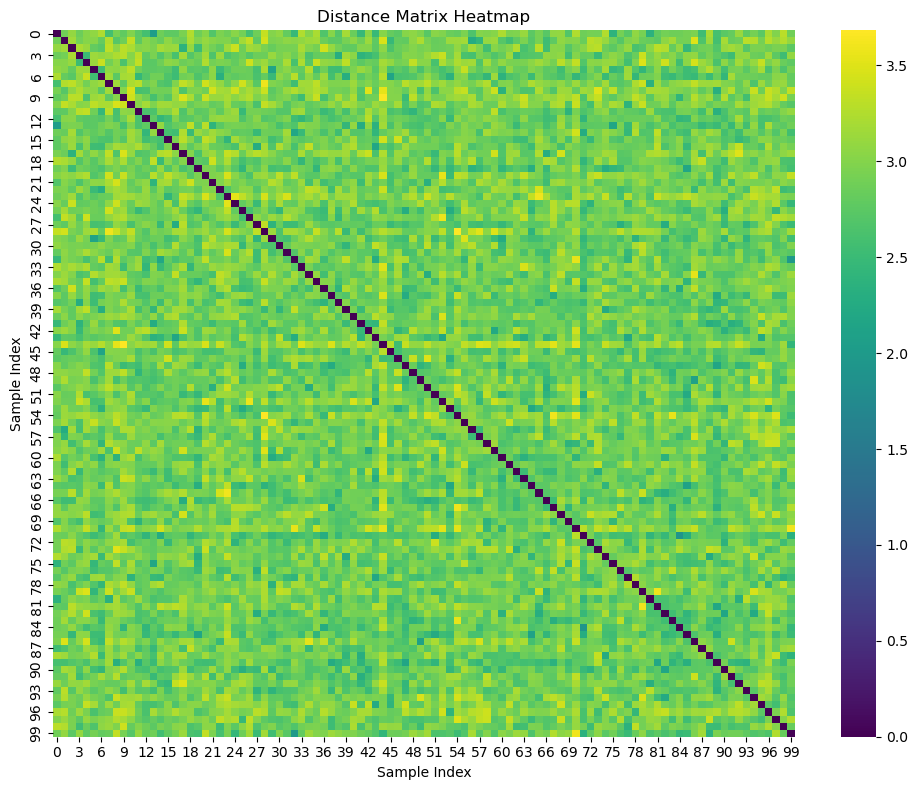

Visualizing nearest neighbors graph...


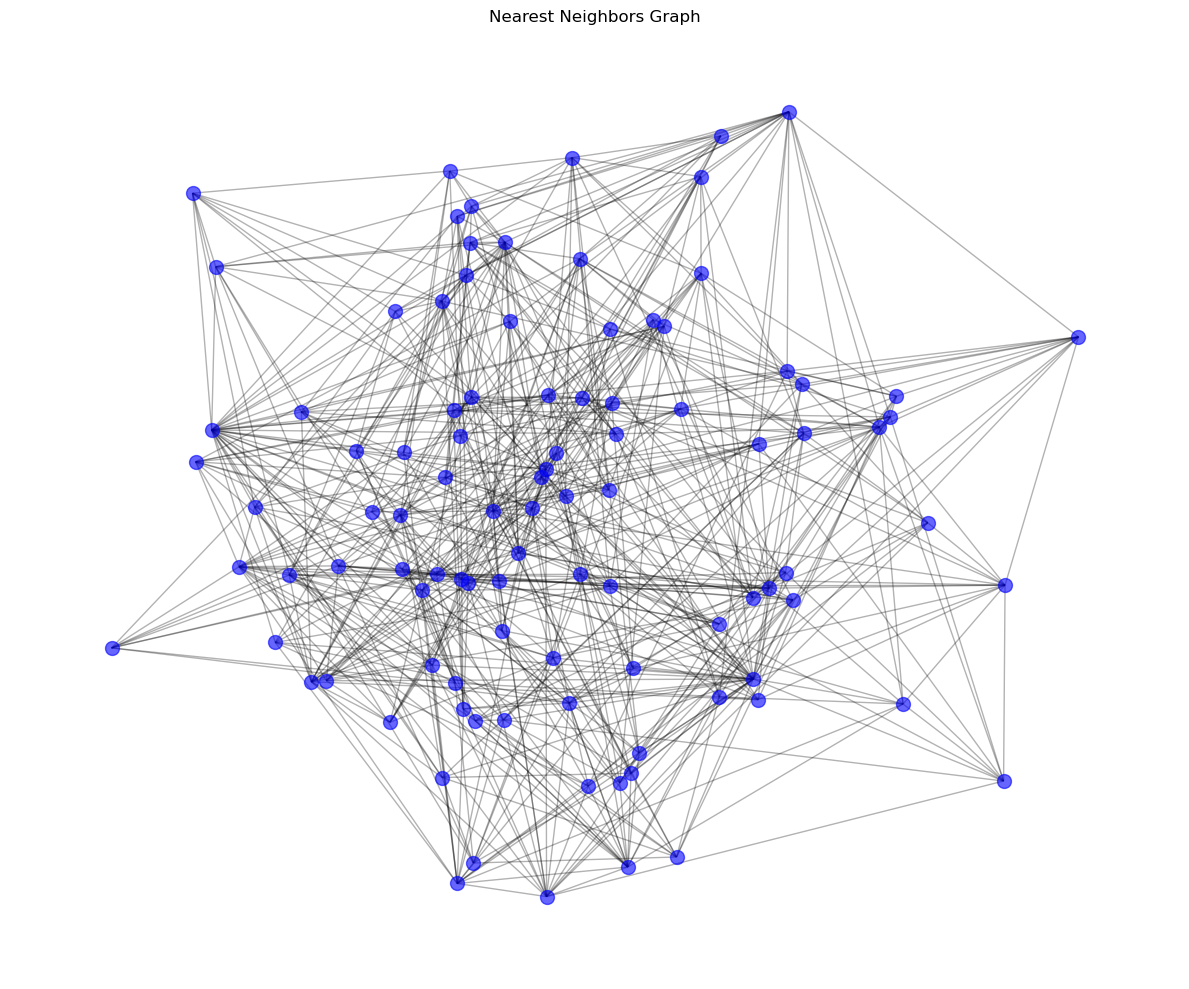

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pynndescent import NNDescent
from sklearn.decomposition import PCA
import networkx as nx

# 1. Generate Random High-Dimensional Data
def generate_data(n_samples=100, n_features=50, random_state=42):
    np.random.seed(random_state)
    data = np.random.rand(n_samples, n_features)
    return data

# 2. Compute Nearest Neighbors and Distance Matrix using pynndescent
def compute_nndescent(data, n_neighbors=10):
    # Initialize NNDescent
    nnd = NNDescent(data, n_neighbors=n_neighbors, metric='euclidean')
    # Query for neighbors
    neighbors, distances = nnd.query(data, k=n_neighbors)
    return neighbors, distances

# 3. Visualize Distance Matrix as a Heatmap
def visualize_distance_matrix(data, title="Distance Matrix Heatmap"):
    from sklearn.metrics import pairwise_distances
    distance_matrix = pairwise_distances(data, metric='euclidean')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_matrix, cmap='viridis')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    plt.tight_layout()
    plt.show()

# 4. Visualize Nearest Neighbors Graph
def visualize_nn_graph(data, neighbors, title="Nearest Neighbors Graph"):
    # Reduce data to 2D using PCA for visualization
    pca = PCA(n_components=2, random_state=42)
    data_2d = pca.fit_transform(data)
    
    # Create a graph
    G = nx.Graph()
    n_samples = data.shape[0]
    G.add_nodes_from(range(n_samples))
    
    # Add edges based on nearest neighbors
    for i in range(n_samples):
        for j in neighbors[i]:
            if i != j:
                G.add_edge(i, j)
    
    # Get positions from PCA
    pos = {i: data_2d[i] for i in range(n_samples)}
    
    plt.figure(figsize=(12, 10))
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', alpha=0.6)
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    # Parameters
    n_samples = 100      # Number of data points
    n_features = 50      # Number of dimensions
    n_neighbors = 10     # Number of nearest neighbors
    random_state = 42    # Seed for reproducibility

    # Step 1: Generate Data
    data = generate_data(n_samples, n_features, random_state)
    print(f"Generated data with shape: {data.shape}")

    # Step 2: Compute Nearest Neighbors
    neighbors, distances = compute_nndescent(data, n_neighbors)
    print("Computed nearest neighbors.")

    # Step 3: Visualize Distance Matrix
    print("Visualizing distance matrix...")
    visualize_distance_matrix(data)

    # Step 4: Visualize Nearest Neighbors Graph
    print("Visualizing nearest neighbors graph...")
    visualize_nn_graph(data, neighbors)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
from pynndescent import NNDescent
from scipy.sparse import csr_matrix

def gsp_distanz_pynndescent(X, Y=None, P=None, n_neighbors=10, metric='euclidean'):
    """
    gsp_distanz_pynndescent calculates the approximate distances between vectors in X and Y
    using the pynndescent library for nearest neighbors.

    Parameters
    ----------
    X : ndarray
        Matrix with column vectors (shape: n x d, where n is the number of vectors and d is the dimension).
    Y : ndarray, optional
        Matrix with column vectors (shape: m x d). Default is X.
    P : ndarray, optional
        Not supported in this implementation. Raises NotImplementedError if provided.
    n_neighbors : int, optional
        Number of nearest neighbors to compute. Default is 10.
    metric : str or callable, optional
        Distance metric to use. Default is 'euclidean'. Must be supported by pynndescent.

    Returns
    -------
    D : csr_matrix
        Sparse distance matrix of shape (n x m) where each row contains distances to the nearest neighbors.
    
    Indices : csr_matrix
        Sparse matrix containing the indices of the nearest neighbors.
    
    Notes
    -----
    - This function uses approximate nearest neighbors for efficiency.
    - If Y is provided and different from X, it computes neighbors from X to Y.
    - If Y is None, it computes neighbors within X.
    - The output distance matrix is sparse, containing distances only to the nearest neighbors.
    """
    if X is None:
        raise ValueError("Input matrix X must be provided.")
    
    if P is not None:
        raise NotImplementedError("Custom metric matrices (P) are not supported in this implementation.")
    
    if Y is None:
        Y = X

    if X.shape[1] != Y.shape[1]:
        raise ValueError("The dimensionality of X and Y must match.")
    
    # Initialize NNDescent with X as the dataset to search
    # If Y is provided and different, use X as query and Y as the dataset
    if np.array_equal(X, Y):
        # Search within X
        nnd = NNDescent(X, n_neighbors=n_neighbors, metric=metric)
        neighbors, distances = nnd.query(X, k=n_neighbors)
    else:
        # Search from X to Y
        nnd = NNDescent(Y, n_neighbors=n_neighbors, metric=metric)
        neighbors, distances = nnd.query(X, k=n_neighbors)
    
    # Construct a sparse distance matrix
    # Rows correspond to each vector in X, columns to their k neighbors in Y
    n_samples_X = X.shape[0]
    n_samples_Y = Y.shape[0]
    
    # Flatten the data for constructing sparse matrix
    row_indices = np.repeat(np.arange(n_samples_X), n_neighbors)
    col_indices = neighbors.flatten()
    data = distances.flatten()
    
    # Create a sparse matrix in CSR format
    D = csr_matrix((data, (row_indices, col_indices)), shape=(n_samples_X, n_samples_Y))
    
    return D

# Example Usage
if __name__ == "__main__":
    import numpy as np

    # Generate Random High-Dimensional Data
    def generate_data(n_samples=100, n_features=50, random_state=42):
        np.random.seed(random_state)
        data = np.random.rand(n_samples, n_features)
        return data

    # Parameters
    n_samples = 100      # Number of data points
    n_features = 50      # Number of dimensions
    n_neighbors = 10     # Number of nearest neighbors
    random_state = 42    # Seed for reproducibility

    # Step 1: Generate Data
    X = generate_data(n_samples, n_features, random_state)
    print(f"Generated data X with shape: {X.shape}")

    # Step 2: Compute Approximate Nearest Neighbors Distance Matrix
    D, neighbors = gsp_distanz_pynndescent(X, n_neighbors=n_neighbors, metric='euclidean')
    print(f"Computed approximate distance matrix D with shape: {D.shape}")
    print(f"Sample distances (first 5 rows):\n{D[:5].toarray()}")



Generated data X with shape: (100, 50)
Computed approximate distance matrix D with shape: (100, 100)
Sample distances (first 5 rows):
[[0.        0.        0.        0.        0.        0.        0.
  2.5875034 0.        0.        0.        0.        0.        2.035373
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        2.5882082 0.
  0.        0.        0.        0.        2.474143  0.        0.
  0.        0.        0.        0.        0.        0.        2.4738328
  0.        2.4787652 0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        2.387823  0.
  0.        0.        0.        2.3483346 0.        0.        0.
  0.        0.        0.        2.5422852 0.        0.        0.
  0.    

In [ ]:
!